## 26th International Conference on Artificial Neural Networks (ICANN)
### Authors: Jordi Ysard, Sock Low, Joeri v Wijngaarden
#### Date: Feb 23rd 2016

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg
import scipy.stats as st
import scipy.ndimage.filters as fi
#from theanoCortexLib import kernel2connection, gkern2
from topologyLib import *
from time import time
import scipy.io
mat = scipy.io.loadmat('queen.mat')

%matplotlib inline

(15027, 100, 2)
[[    0.            21.53320312    43.06640625    64.59960938    86.1328125
    107.66601562   129.19921875   150.73242188   172.265625     193.79882812
    215.33203125   236.86523438   258.3984375    279.93164062
    301.46484375   322.99804688   344.53125      366.06445312
    387.59765625   409.13085938   430.6640625    452.19726562
    473.73046875   495.26367188   516.796875     538.33007812
    559.86328125   581.39648438   602.9296875    624.46289062
    645.99609375   667.52929688   689.0625       710.59570312
    732.12890625   753.66210938   775.1953125    796.72851562
    818.26171875   839.79492188   861.328125     882.86132812
    904.39453125   925.92773438   947.4609375    968.99414062
    990.52734375  1012.06054688  1033.59375     1055.12695312
   1076.66015625  1098.19335938  1119.7265625   1141.25976562
   1162.79296875  1184.32617188  1205.859375    1227.39257812
   1248.92578125  1270.45898438  1291.9921875   1313.52539062
   1335.05859375  1356.59

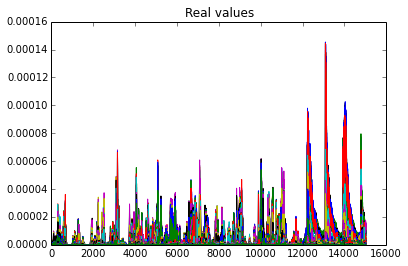

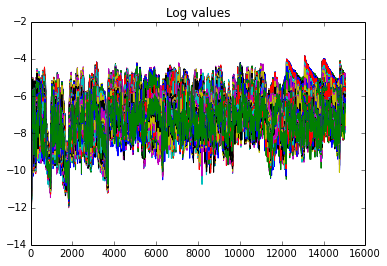

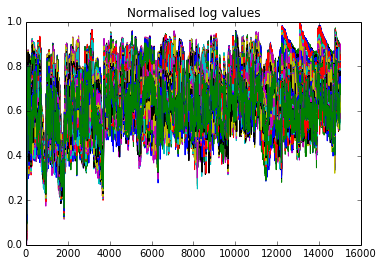

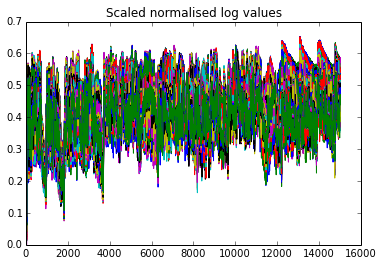

In [18]:
#Shapes of queen.mat
print mat['S'].shape
print mat['f']
print mat['fs']
print mat['t'].shape

#Organise input
real_input         = mat['S'][:,:,0]#/0.00015
log_input          = np.log10(real_input)
norm_input         = (log_input-np.min(log_input)) / (np.max(log_input)-np.min(log_input))
scaled_norm_input  = norm_input*np.mean(np.mean(norm_input,1),0)
dT                 = 1./mat['fs'][0][0]
times              = np.around(mat['t'],3)[0]

#Plot real versus log input
plt.plot(real_input)
plt.title('Real values')
plt.show()
plt.plot(log_input)
plt.title('Log values')
plt.show()
plt.plot(norm_input)
plt.title('Normalised log values')
plt.show()
plt.plot(scaled_norm_input)
plt.title('Scaled normalised log values')
plt.show()

In [3]:
def normalizeInput(inp,means, alpha, std):
    inp[np.isfinite(inp) == False] = 0
    
    means = means*(alpha)+(1-alpha)*inp
    
    std = np.sqrt(np.power(std,2)*(1-alpha)+np.power(inp-means,2)*alpha)
    inp = 0.5 + 0.5*np.tanh((inp-means)/(std))#np.sqrt(2))
    inp *=inp# np.log(inp)
    inp -= np.min(inp)
    inp /= np.max(inp)

    inp[np.isfinite(inp) == False] = 0
    return inp,means,std



In [4]:
# Need to tune for width and intensity too
def generateMovingFFT(F, iteration, direction, sigma, intensity, noise=0.2, size = 15):
    aux1 = 1#(1/(sigma*np.sqrt(2*np.pi)))
    x = np.array(range(size))
    res = aux1*np.exp(-np.power(x-F,2)/(2.*(np.power(sigma,2))))
    res = res + (np.random.rand(size)-0.5)*noise+noise/2
    x=res 
    #plt.plot(res)
    #plt.show()
    
    #print it%14<12
    if False:#iteration%14<12:
        j=int(iteration%12)/2
        aux1 = (1/(sigma*np.sqrt(2*np.pi)))
        x = np.array(range(size))
        res = aux1*np.exp(-np.power(x-(F+int(direction*j)),2)/(np.power(sigma,2)))#/float(2*s1)
        res = res + (np.random.rand(size)-0.5)*noise+noise/2
        x=res
        #for i in np.array(range(3))-1:
        #    n = min(max(F+i+int(direction*j), 0),size-1)
        #    x[n]=1-0.3*abs(i)
    #print x
    return x#.reshape(size,1)
def randomPoissonGenerator(N=800,I=0.03,P=0.2):
    I_poisson = np.zeros(N)
    idx = np.where(np.random.rand(N)<P)[0]
    I_poisson[idx] = I
    return I_poisson


    
    
#randomPoissonGenerator()

(5, 5)
Remember to always check how is the kernel!!!


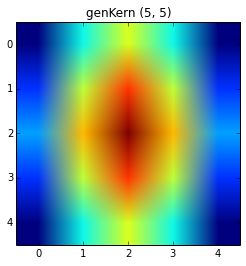

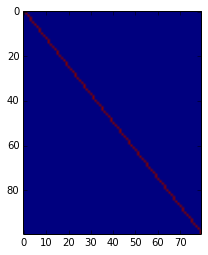

[info] Kernel shape: (5, 5)
[info] Connection Matrix shape: (100, 80)
2.5
2.5
shape: (5, 5)
here!!!!!


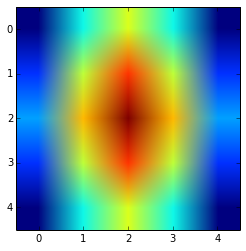

shape: (25,)


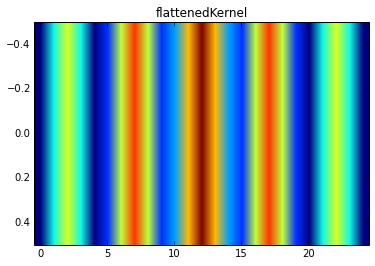

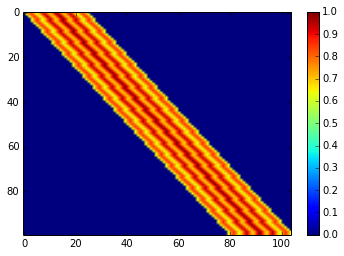

80
Down!!!!!!!!!!!!!!!!!!1
[info] Shape was fit from (100, 104) to (100, 80)


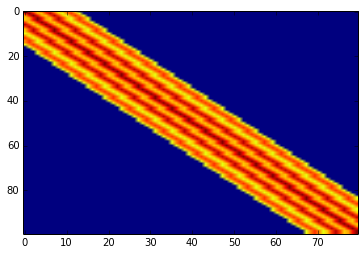

(100, 80)
asd


In [5]:
#Neurons
Ne_x = 16
Ne_y = 5
Ne   = Ne_x*Ne_y  #Excitatory neurons
Ni_x = 5
Ni_y = 4
Ni   = Ni_x*Ni_y  #Inhibitory neurons

K = 9.*20*.0020#.4*20*9. #Input scaling param

#Connectivity matrix S (input->E)
N_shape    = (Ne_x,Ne_y)  #Shape of excitatory population
i_shape    = (100,1)      #Shape of input signal
kern_shape = (5,5)        #Shape of kernel
sigma      = [5,5]        #Width of kernel
kern1      = gkern2( kern_shape,sigma )
S  = kernel2connection( kern1,i_shape,N_shape )
np.save('S.npy',S)
print S.shape
print 'asd'


S /= np.sum(S,1).reshape(( S.shape[0],1 ))*i_shape[0]
if np.sum( S,1 )[0] != 1:
    S /= np.sum( S,1 ).reshape(( S.shape[0],1 ))

#Connectivity matrix W (E<->I)
W1 = np.zeros(( Ne,Ne )) #E->E
W3= 0.01*np.ones((Ni,Ne))+0.003*np.random.rand( Ni,Ne )#I->E
W4= 0.01*np.ones((Ne,Ni))+0.003*np.random.rand( Ne,Ni )#E->I
W2 = 0.*np.random.rand( Ni,Ni ) # I->I

# Normalizing the input
means = np.zeros(i_shape)
std = np.ones(i_shape)
tau_input = 0.

# add Rate stdp
LR = 0.0000051
WM=.8
Wm=0.
delta_p=.6
delta_m=.7
We=-.8 #set to .5

Exc=np.zeros((1,Ne))
inp = np.zeros(i_shape)
Inh=np.zeros((1,Ni))

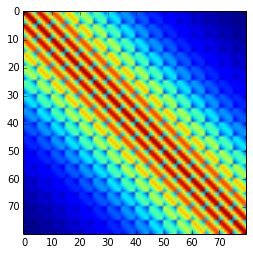

Elapsed: 0ms
Elapsed: 1000ms
Elapsed: 2000ms
Elapsed: 3000ms
Elapsed: 4000ms
Elapsed: 5000ms
Elapsed: 6000ms
Elapsed: 7000ms
Elapsed: 8000ms
Elapsed: 9000ms
Elapsed: 10000ms
Elapsed: 11000ms
Elapsed: 12000ms
Elapsed: 13000ms
Elapsed: 14000ms
Elapsed: 15000ms
Elapsed: 16000ms
Elapsed: 17000ms
Elapsed: 18000ms
Elapsed: 19000ms
Elapsed: 20000ms
Elapsed: 21000ms
Elapsed: 22000ms
Elapsed: 23000ms
Elapsed: 24000ms
Elapsed: 25000ms
Elapsed: 26000ms
Elapsed: 27000ms
Elapsed: 28000ms
Elapsed: 29000ms
Elapsed: 30000ms
Elapsed: 31000ms
Elapsed: 32000ms
Elapsed: 33000ms
Elapsed: 34000ms
Elapsed: 35000ms
Elapsed: 36000ms
Elapsed: 37000ms
Elapsed: 38000ms
Elapsed: 39000ms
Elapsed: 40000ms
Elapsed: 41000ms
Elapsed: 42000ms
Elapsed: 43000ms
Elapsed: 44000ms


In [6]:
#Starting simulation
time =45000 #in ms
dt   = 1    #in ms
#spikeMat = np.zeros( (Nt,time) )
stdp_neuron = np.zeros( (time,3) ) 
freqs = [20,40,60, 80]
bandwiths = [2,3,4,5]
firings=[[],[]]
#W# = np.load('W_stdp_10s.npy')
W2save = np.zeros( (20,1000,1000) )
cc=1
f=0
noise=0.25 ## THIS IS THE AUDITORY NOISE
inp_intensity=.6
inp_sigma = 2 ## SIGMA FOR THE INPUT
inp_direction=0 #NOT USED RIGHT NOW
T=600 #Trial
off=200 # offset

t_act=0

K=1. #8. # for real_input

Exc_log=np.zeros((time,Ne))
Inh_log=np.zeros((time,Ni))
r_stim = np.zeros((100,time))
stim = np.zeros((100,1))
Wlog=np.zeros(W1.shape)
W0=W1


#Synaptogenesis parameters

kd=.1 #influence of distance !Attention, this parameter is inverse to the real one
Mp=1.  #Max probability
max_distance_x= 10. # in number of neurons
max_distance_y= 5. # in number of neurons
distances = np.zeros(W1.shape)
x = np.arange(0,max_distance_x,max_distance_x/N_shape[0]).reshape(N_shape[0],1)*np.ones(N_shape)
y = np.arange(0,max_distance_y,max_distance_y/N_shape[1]).reshape(1,N_shape[1])*np.ones(N_shape)
x=x.reshape(Ne)
y=y.reshape(Ne)
x = x*np.ones((x.size,x.size))
y = y*np.ones((y.size,y.size))

dx = x-x.transpose()
dy = y-y.transpose()
not_identity = (np.identity( Ne )==0)  #Non-identity matrix

W1 = W1*not_identity  #Remove self-excitation
W1 += np.identity(Ne)*.3

W2*=(np.identity(Ni)==0)
W2+=np.identity(Ni)*.7


#a_trace = 1-1/30
#trace = np.zeros(STDP_p.shape)

distances = dx**2+dy**2
_distances = 1/(1+kd*distances)

plt.imshow(_distances)
plt.show()
'''
plt.imshow(W1)
plt.show()

plt.imshow(not_identity)
plt.show()

plt.imshow((W1<=.0).astype(np.float32))
plt.show()'''


for i in range(time):
        
    if i%1000==0:
        print "Elapsed: " +str(i) + "ms"
        
        '''plt.figure(figsize=(20,5))
        plt.imshow(r_stim, aspect='auto')
        plt.colorbar()
        plt.show()

        plt.figure(figsize=(20,5))
        plt.imshow(Exc_log.T,vmin=0.,vmax=1., aspect='auto')
        plt.colorbar()
        plt.show()

        plt.figure(figsize=(20,5))
        plt.imshow(Inh_log.T,vmin=0.,vmax=1., aspect='auto')
        plt.colorbar()
        plt.show()'''
    try:
        if i/1000. > times[t_act+1]:
            t_act+=1
            #print t_act
    except:
        break
    stim[:,0] = norm_input[t_act][:] #np.log(real_input[t_act][:])

    #stim, means, std = normalizeInput(stim.reshape(i_shape), means, tau_input, std)
    #stim = np.tanh(stim)
    r_stim[:,i]=stim[:,0]
    #print np.any(np.isnan(stim))
    #Propagate Activity
    if False:
        print S.shape
        print W1.shape
        print W3.shape
        print np.dot(stim.T*K,S).shape
        print np.dot(Exc,W1).shape
        print  np.dot(Inh,W3).shape
        plt.plot(randomPoissonGenerator(Ne,0.2,0.15))
        plt.show()
    
    
    Exc = 0.5+0.5*np.tanh(np.dot(stim.T*K,S)/np.sum(S,axis=0) 
                          + np.dot(Exc,W1)/np.sum(W1,axis=0) 
                          - 2.*np.dot(Inh,W3)/np.sum(W3,axis=0)
                          + randomPoissonGenerator(Ne,0.1,0.05) 
                         )
    if np.isnan(Exc).any():
        print 'error: NAN found in Exc. At iteration: ' + str(i)
        break
    
    #print np.any(np.isnan(Exc))
    Exc[np.isnan(Exc)]=0.
    Inh = 0.5+0.5*np.tanh(2*np.dot(Exc,W4) 
                          - np.dot(Inh,W2) 
                          + randomPoissonGenerator(Ni,0.1,0.05) 
                         )
    Inh[np.isnan(Inh)]=0.
    Exc_log[i,:]=Exc[0,:]
    Inh_log[i,:]=Inh[0,:]
    
    #Mask W
    mask_C_0 = (W1<=0.0001).astype(np.float32)
    
    #Compute probability of connection
    probabilities = Mp*np.dot(W1*_distances,_distances.transpose())*mask_C_0 
    '''plt.imshow(probabilities)
    plt.title('probabilities')
    plt.show()'''
    
    #Compute dW based on STDP    
    #STDP
    Apm = delta_p*(WM-W1)-delta_m*(Wm-W1)
    dW1=50*LR*Apm*np.dot(Exc.T,Exc) + 50*LR*delta_p*(Wm-W1)*We*W1
    
    Apm = delta_p*(WM-W2)-delta_m*(Wm-W2)
    dW2=LR*0.1*Apm*np.dot(Inh.T,Inh) + LR*0.1*delta_p*(Wm-W2)*We*W2
    
    Apm = delta_p*(WM-W3)-delta_m*(Wm-W3)
    dW3=LR*0.1*Apm*np.dot(Inh.T,Exc) + LR*.1*delta_p*(Wm-W3)*We*W3
    
    Apm = delta_p*(WM-W4)-delta_m*(Wm-W4)
    dW4=LR*.1*Apm*np.dot(Exc.T,Inh) + LR*.1*delta_p*(Wm-W4)*We*W4
    
    if np.isnan(dW1).any():
        print 'error: NAN found in dw. At iteration: ' + str(i)
        break
    
    #trace = dW1 + a_trace*trace # Used for spiking networks
    
    # Create new dendrite if weighted probability is greater than 0.7
    new_dendrites = probabilities * dW1 -np.random.rand(Ne,Ne)#+ trace[:-200,:-200]
    '''plt.imshow(new_dendrites)
    plt.colorbar()
    plt.show()
    plt.imshow(dW1)
    plt.colorbar()
    plt.show()'''
    if i<0:
        print np.max(new_dendrites)
        print np.min(new_dendrites)
    dC = (new_dendrites > 0) #* dW[:-200,:-200]
    #print np.any(dC)
    
    #Update weights
    W1 = W1 + 0.01*(mask_C_0*dC)
    W1+=( mask_C_0==0.)*dW1*(np.identity( Ne )==0)
    
    W2 += dW2*(np.identity( Ni )==0)
    W3 += dW3
    W4 += dW4
    W1=W1.clip(0,1)
    W2=W2.clip(0,1)
    W3=W3.clip(0,1)
    W4=W4.clip(0,1)
    Wlog=W1

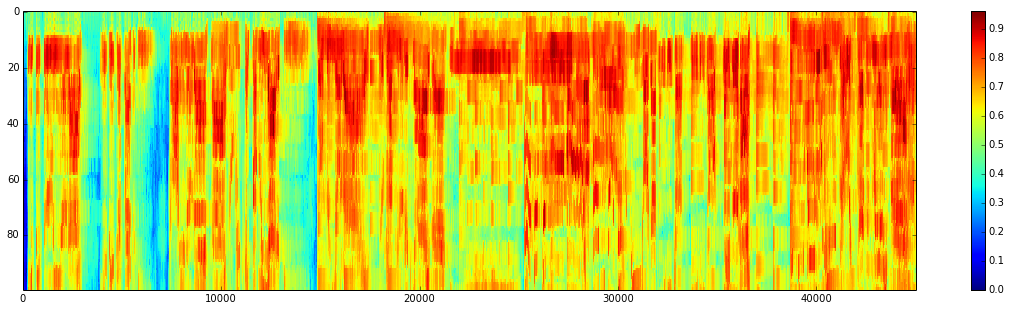

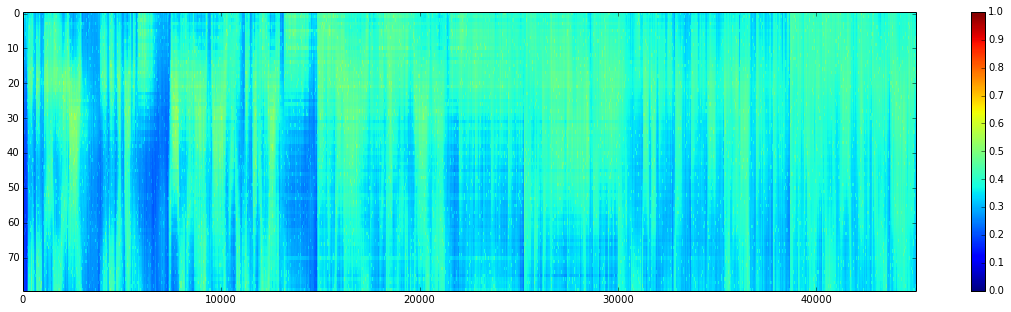

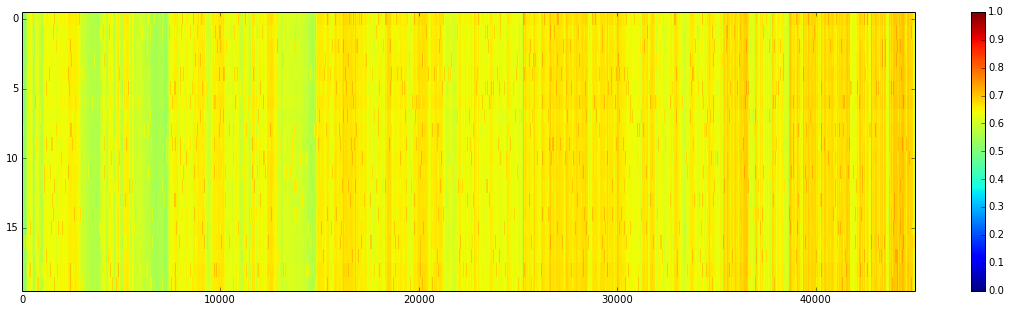

In [7]:
plt.figure(figsize=(20,5))
plt.imshow(r_stim, aspect='auto',interpolation='nearest')
plt.colorbar()
plt.show()

plt.figure(figsize=(20,5))
plt.imshow(Exc_log.T,vmin=0.,vmax=1., aspect='auto',interpolation='nearest')
plt.colorbar()
plt.show()

plt.figure(figsize=(20,5))
plt.imshow(Inh_log.T,vmin=0.,vmax=1., aspect='auto',interpolation='nearest')
plt.colorbar()
plt.show()



#print np.all(np.isnan(Exc_log))

    
    

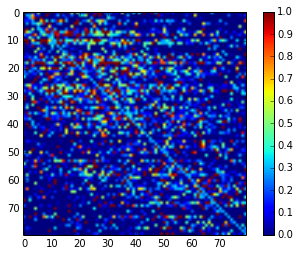

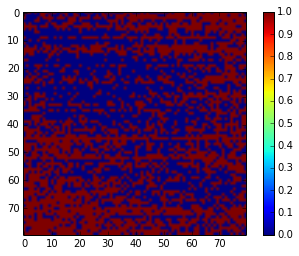

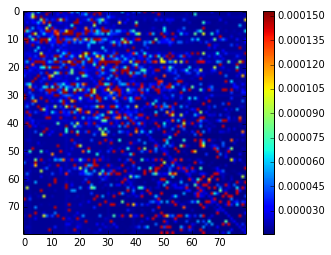

1.0
0.0
[[0 1 1 ..., 1 1 0]
 [1 0 0 ..., 0 1 0]
 [1 0 0 ..., 1 1 1]
 ..., 
 [1 0 0 ..., 0 1 0]
 [1 0 1 ..., 1 0 0]
 [1 1 1 ..., 0 1 0]]


In [8]:
plt.imshow(W1,vmin=0)
plt.colorbar()
plt.show()

plt.imshow(mask_C_0.astype(np.float32))
plt.colorbar()
plt.show()
plt.imshow(dW1)
plt.colorbar()
plt.show()

print np.max(mask_C_0)
print np.min(mask_C_0)
print mask_C_0.astype(int)

### Test

In [9]:
def generateSquareFFT(bn,bin_size,n_bins, noise=0.05):
    aux1 = 1#(1/(sigma*np.sqrt(2*np.pi)))
    x = np.array(range(n_bins))
    res =  (np.random.rand(n_bins)-0.5)*noise+noise/2
    for i in range(bin_size):
        res[bn*bin_size+i]+=0.5
    x=res 
    #plt.plot(res)
    #plt.show()
    
    #print it%14<12
    if False:#iteration%14<12:
        j=int(iteration%12)/2
        aux1 = (1/(sigma*np.sqrt(2*np.pi)))
        x = np.array(range(size))
        res = aux1*np.exp(-np.power(x-(F+int(direction*j)),2)/(np.power(sigma,2)))#/float(2*s1)
        res = res + (np.random.rand(size)-0.5)*noise+noise/2
        x=res
        #for i in np.array(range(3))-1:
        #    n = min(max(F+i+int(direction*j), 0),size-1)
        #    x[n]=1-0.3*abs(i)
    #print x
    return x#.reshape(size,1)

In [10]:
# 100 bins
# size bin = 5
n_bins = 100
bin_size=5
trials = 10
time = 600
pre_post = 150
noise = 0.2
RFS = np.zeros((n_bins/bin_size,trials,time,Ne))
RFS2 = np.zeros((n_bins/bin_size,trials,time,Ni))
test_stim = np.zeros((n_bins,(n_bins/bin_size) * trials * time))
test_exc = np.zeros((Ne,(n_bins/bin_size) * trials * time))
test_inh = np.zeros((Ni,(n_bins/bin_size) * trials * time))
print (n_bins/bin_size) * trials * time
for tr in range(trials):
    for bn in range(n_bins/bin_size):
        for ti in range(time):
            if ti%time < pre_post:
                stim =  (np.random.rand(n_bins)-0.5)*noise+noise/2
            elif ti%time < time-pre_post:
                stim = generateSquareFFT(bn,bin_size,n_bins,noise=noise)
            else:
                stim = (np.random.rand(n_bins)-0.5)*noise+noise/2
                
            Exc = 0.5+0.5*np.tanh(np.dot(stim.T*K,S)/np.sum(S,axis=0) 
                                  + np.dot(Exc,W1)/np.sum(W1,axis=0) 
                                  - 2.*np.dot(Inh,W3)/np.sum(W3,axis=0)
                                  + randomPoissonGenerator(Ne,0.1,0.2) 
                                 )

            #print np.any(np.isnan(Exc))
            Exc[np.isnan(Exc)]=0.
            Inh = 0.5+0.5*np.tanh(2*np.dot(Exc,W4) 
                                  - np.dot(Inh,W2) 
                                  + randomPoissonGenerator(Ni,0.1,0.2) 
                                 )
            RFS[bn,tr,ti,:]=Exc
            RFS2[bn,tr,ti,:]=Inh
            i=(bn*trials+tr)*time + ti
            test_exc[:,i]=Exc
            test_inh[:,i]=Inh
            test_stim[:,i]=stim
            if i%5000==0:
                print '#iteration: ' + str(i)
            
            

120000
#iteration: 0
#iteration: 30000
#iteration: 60000
#iteration: 90000
#iteration: 25000
#iteration: 55000
#iteration: 85000
#iteration: 115000
#iteration: 20000
#iteration: 50000
#iteration: 80000
#iteration: 110000
#iteration: 15000
#iteration: 45000
#iteration: 75000
#iteration: 105000
#iteration: 10000
#iteration: 40000
#iteration: 70000
#iteration: 100000
#iteration: 5000
#iteration: 35000
#iteration: 65000
#iteration: 95000


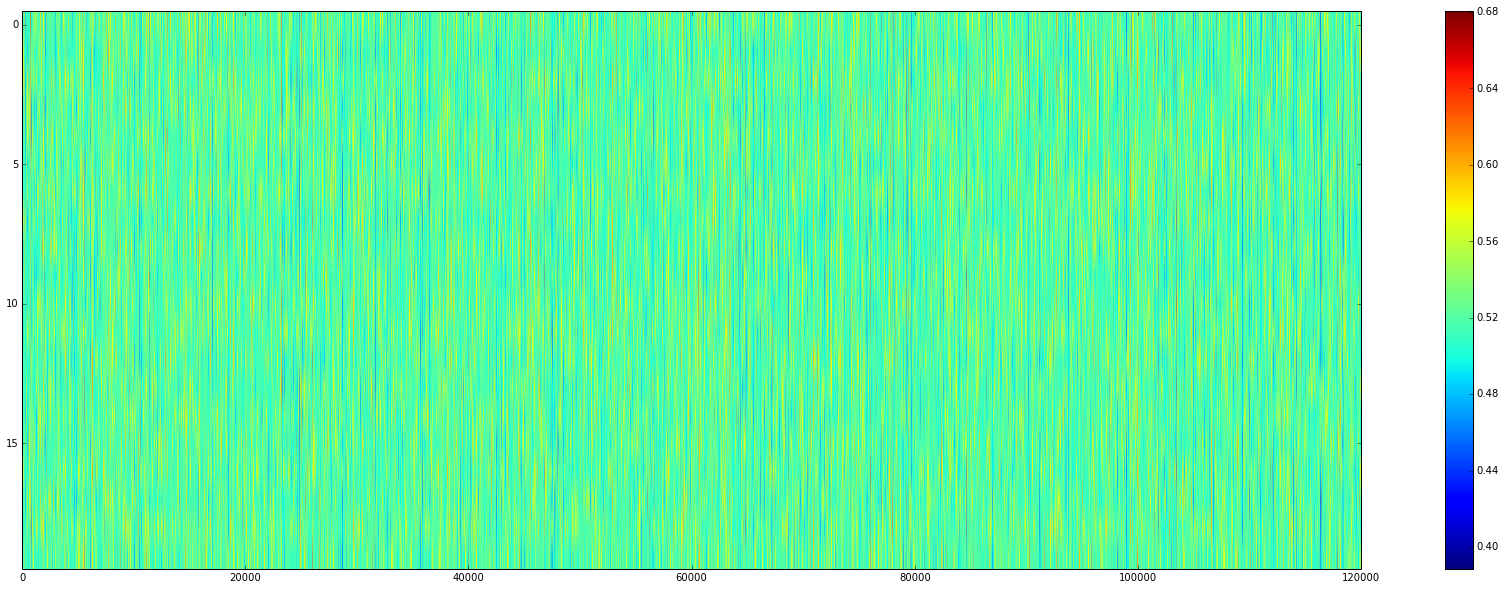

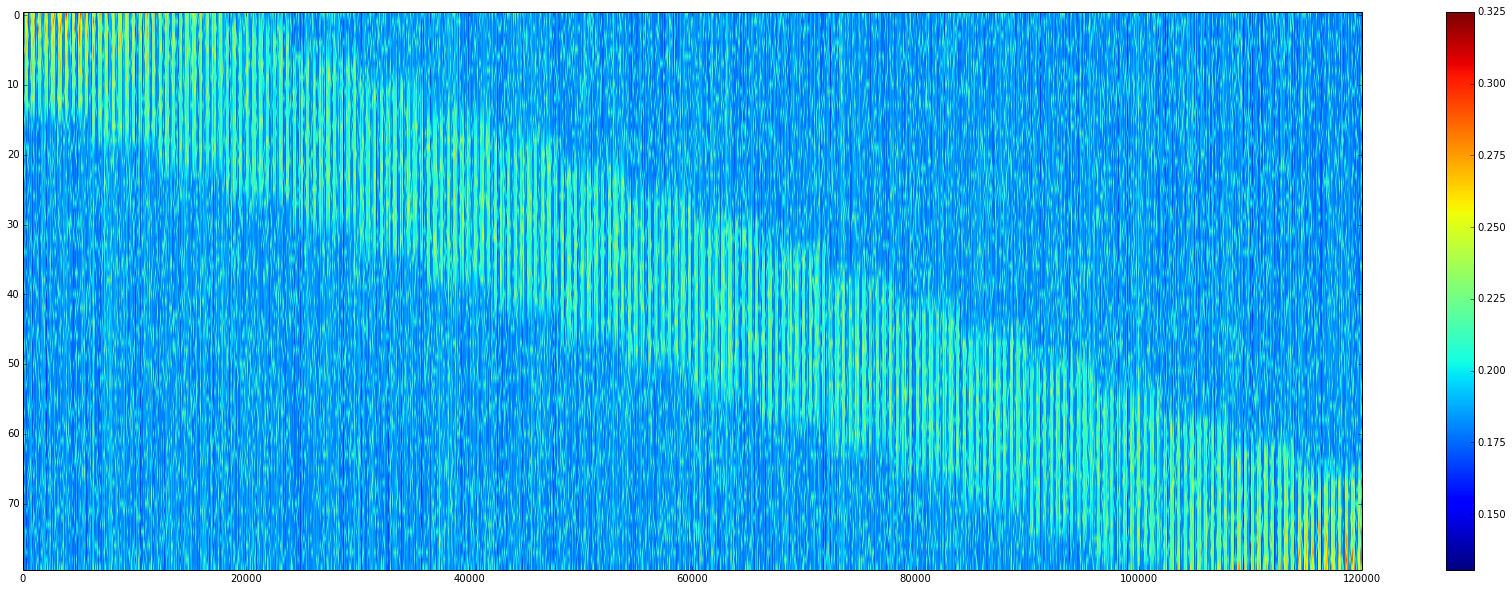

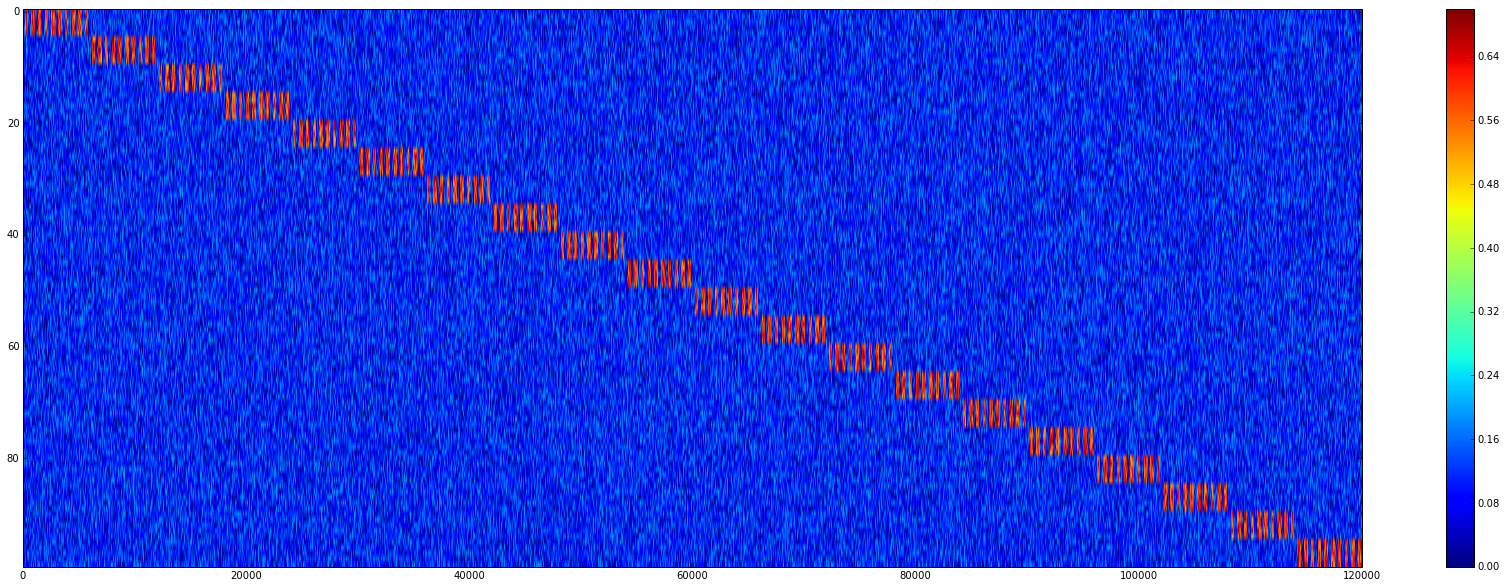

In [11]:
plt.figure(figsize=(30,10))
plt.imshow(test_inh,aspect='auto')
plt.colorbar()
plt.show()
plt.figure(figsize=(30,10))
plt.imshow(test_exc,aspect='auto')
plt.colorbar()
plt.show()
plt.figure(figsize=(30,10))
plt.imshow(test_stim,aspect='auto')
plt.colorbar()
plt.show()

### Plot receptive fields 

In [12]:
# STRF
# Generate data pieces
pre_post_range = 30
baseline = RFS[:,:,:pre_post]
data = RFS[:,:,pre_post-pre_post_range:-pre_post+pre_post_range]
print 'Shape of:'
print 'Obtained data ([Freqs, trials, time in trials, neurons]):  '+str(RFS.shape) #[Freqs, trials, time in trials]
print 'Data ([Freqs, trials, time in trials, neurons]):           '+str(data.shape)
print 'Baseline ([Freqs, trials, time in trials, neurons]):       '+str(baseline.shape)

# need to define a time-window: the data will be compared in bins of data, to baseline
n = data.shape[2]  # num timesteps
k = 10             # resolution bin

processed_data = np.zeros((data.shape[0],data.shape[1],k,n-k,data.shape[3]))
print processed_data.shape
for i in range(n-k):
    processed_data[:,:,:,i,:] = data[:,:,i:i+k,:]

# Compute t_test
strf_t = np.zeros((processed_data.shape[0],processed_data.shape[1],processed_data.shape[2],processed_data.shape[3],processed_data.shape[4]))
strf_p = np.zeros((processed_data.shape[0],processed_data.shape[1],processed_data.shape[2],processed_data.shape[3],processed_data.shape[4]))
for F in range(processed_data.shape[0]):                    # for each frequency
    for N in range(processed_data.shape[4]):                # for each neuron
        for T in range(processed_data.shape[1]):            # for each trial
            for k in range(processed_data.shape[3]):        # for each bin
                strf_t[F,T,:,k,N],strf_p[F,T,:,k,N] = st.ttest_1samp(a=processed_data[F,T,:,k,N], popmean=np.nanmean(baseline[F,T,:,N],axis=0))

Shape of:
Obtained data ([Freqs, trials, time in trials, neurons]):  (20, 10, 600, 80)
Data ([Freqs, trials, time in trials, neurons]):           (20, 10, 360, 80)
Baseline ([Freqs, trials, time in trials, neurons]):       (20, 10, 150, 80)
(20, 10, 10, 350, 80)


(20, 10, 10, 350, 80)
(20, 10, 350, 80)


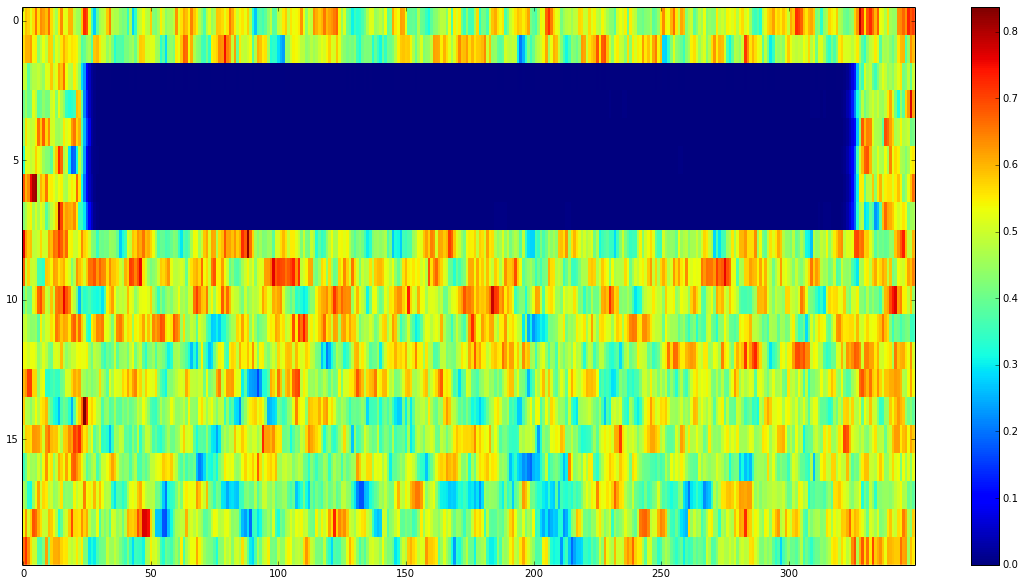

In [16]:
print strf_t.shape
strf_mean = np.mean(strf_t,axis=1)
print strf_mean.shape
plt.figure(figsize=(20,10))
plt.imshow(strf_mean[:,0,:,20],aspect='auto',interpolation='none')
plt.colorbar()
plt.show()

(20, 10, 10, 350, 80)
(20, 10, 350, 80)


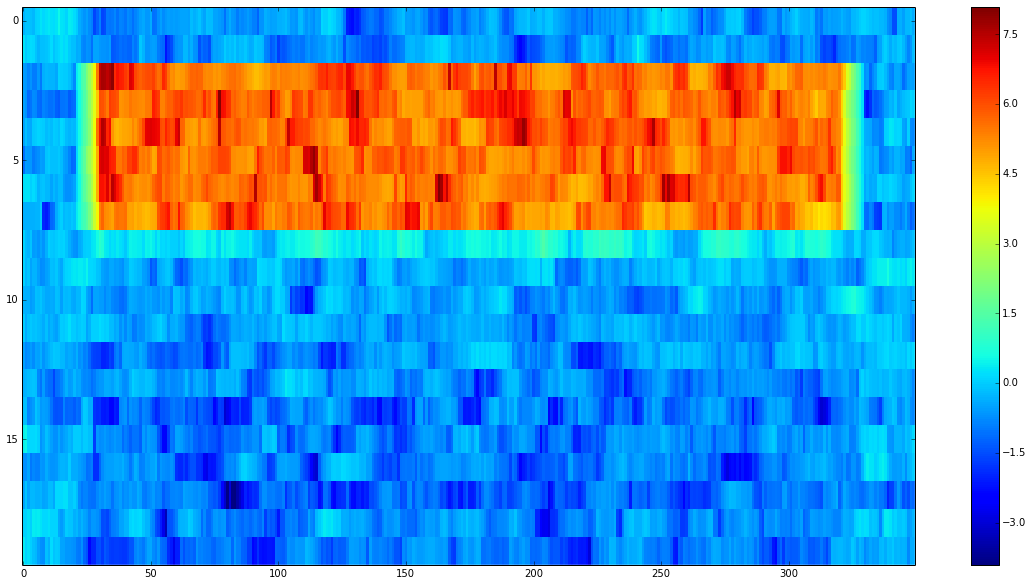

In [17]:
print strf_p.shape
strf_mean2 = np.mean(strf_p,axis=1)
print strf_mean2.shape
plt.figure(figsize=(20,10))
plt.imshow(strf_mean2[:,0,:,20],aspect='auto',interpolation='none')
plt.colorbar()
plt.show()